In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare Dataset

In [2]:
df_item_categories = pd.read_csv('data/item_categories.csv')
df_items = pd.read_csv('data/items.csv')
df_sales = pd.read_csv('data/sales_train.csv')
df_shops = pd.read_csv('data/shops.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train = df_sales.merge(df_shops, on = 'shop_id', how = 'left')
df_train = df_train.merge(df_items, on = 'item_id', how ='left')
df_train = df_train.merge(df_item_categories, on = 'item_category_id', how = 'left')

## Visualization

### Daily sales count
- Values ​​over 1000 will be considered outliers and removed.

<Axes: ylabel='item_cnt_day'>

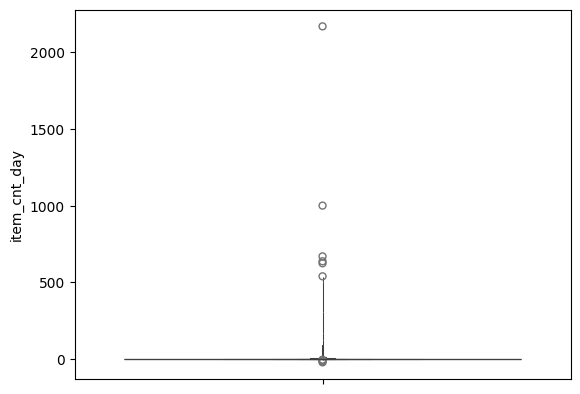

In [4]:
sns.boxenplot(y = 'item_cnt_day', data = df_train)

### Item price
- There are values ​​over 300000. This value will be judged as an outlier and removed.
- In the future, values ​​of `item_price` greater than 50000 will be judged as outliers.

<Axes: ylabel='item_price'>

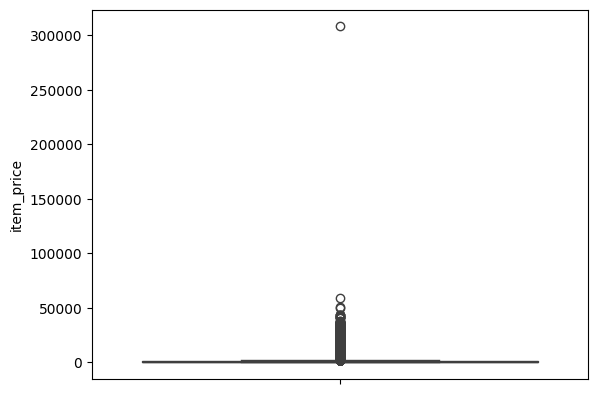

In [5]:
sns.boxplot(y = 'item_price', data = df_train)

### Monthly sales count

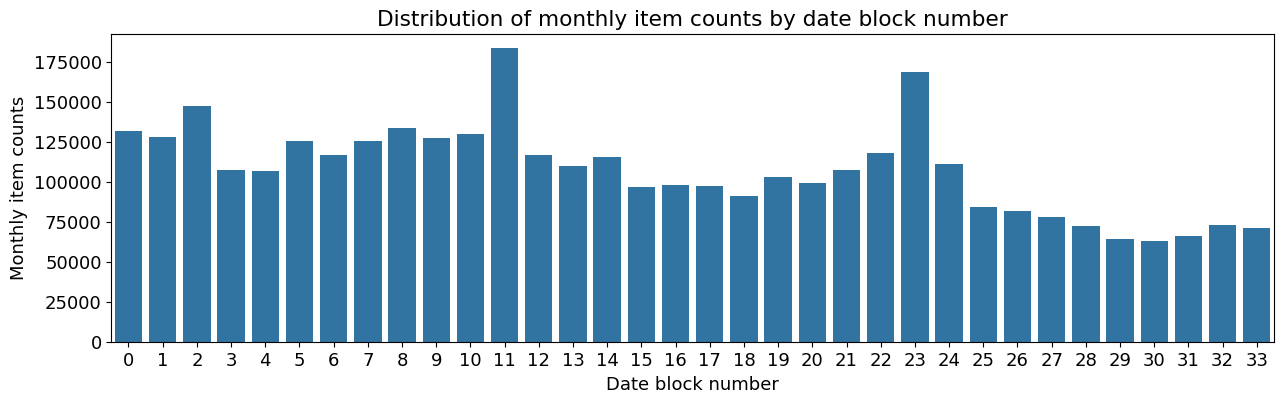

In [6]:
df_group = df_train.groupby('date_block_num')['item_cnt_day'].sum().reset_index()

mpl.rc('font', size = 13)

figure = plt.figure(figsize=(15, 4))

sns.barplot(x = 'date_block_num', y = 'item_cnt_day', data = df_group)

plt.title('Distribution of monthly item counts by date block number')
plt.xlabel('Date block number')
plt.ylabel('Monthly item counts')

plt.show()

### Sales count by item category

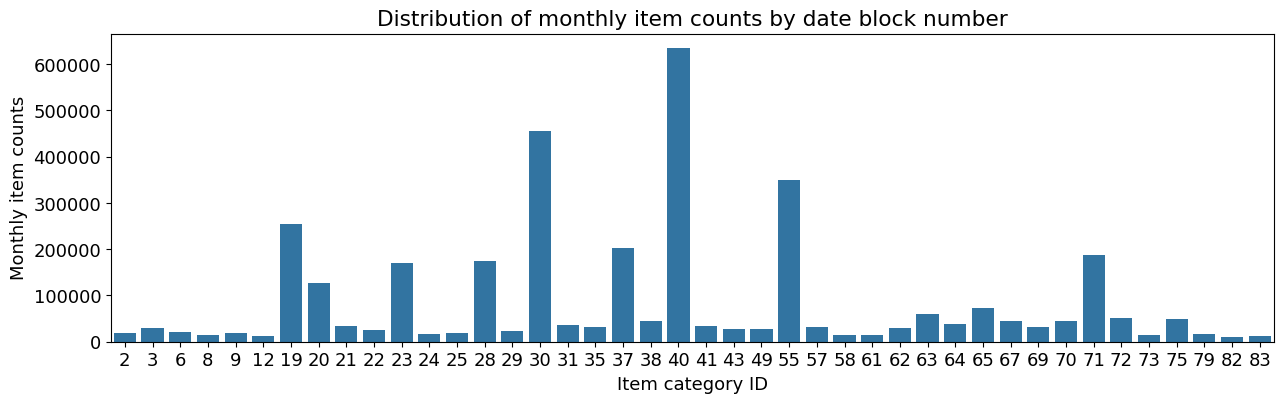

In [7]:
df_group = df_train.groupby('item_category_id')['item_cnt_day'].sum().reset_index()
df_group = df_group.loc[df_group.item_cnt_day > 10000]

mpl.rc('font', size = 13)

figure = plt.figure(figsize=(15, 4))

sns.barplot(x = 'item_category_id', y = 'item_cnt_day', data = df_group)

plt.title('Distribution of monthly item counts by date block number')
plt.xlabel('Item category ID')
plt.ylabel('Monthly item counts')

plt.show()

### Sales count by shop

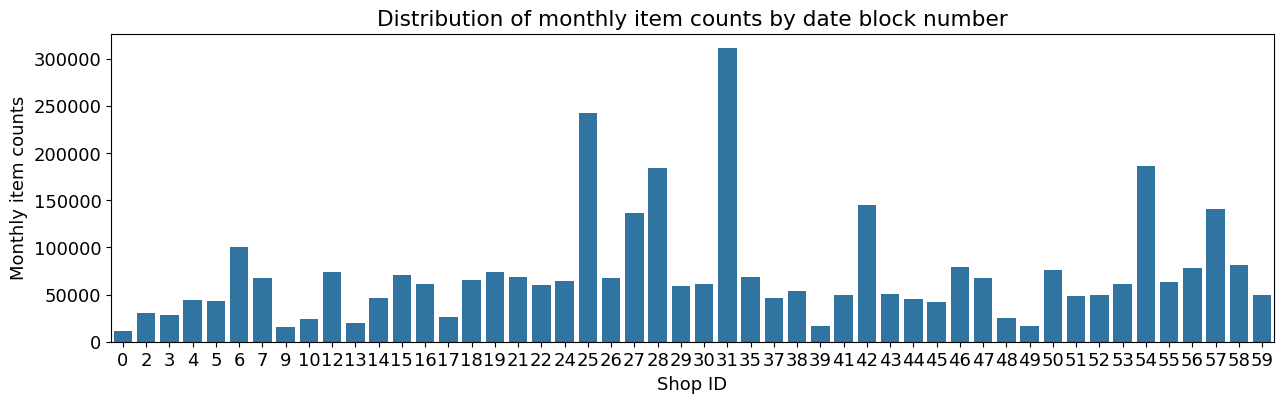

In [8]:
df_group = df_train.groupby('shop_id')['item_cnt_day'].sum().reset_index()
df_group = df_group.loc[df_group.item_cnt_day > 10000]
mpl.rc('font', size = 13)

figure = plt.figure(figsize=(15, 4))

sns.barplot(x = 'shop_id', y = 'item_cnt_day', data = df_group)

plt.title('Distribution of monthly item counts by date block number')
plt.xlabel('Shop ID')
plt.ylabel('Monthly item counts')

plt.show()